In [1]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
# Load the iris dataset from sklearn
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from pca import PCA  # Import the PCA class from your implementation

# Initialize and fit PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [5]:
# Train a classifier (K-Nearest Neighbors in this example)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Evaluate the classifier
accuracy = knn.score(X_test_pca, y_test)
print(f"Accuracy of K-NN classifier after PCA: {accuracy:.2f}")

Accuracy of K-NN classifier after PCA: 0.93


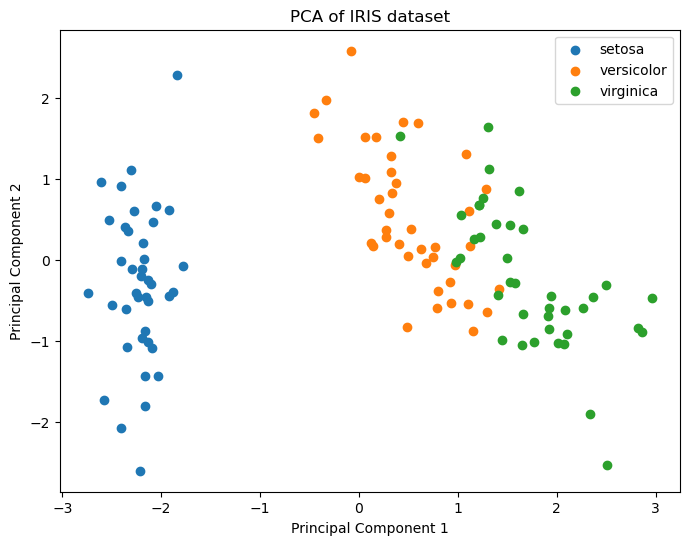

In [6]:
# Visualize the reduced-dimensional data
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name)

plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
